#**Project Name** - Bank Loan Case Study

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Discription -**

###Bank Loan Case Study is about finding trends and insights about loan application dataset from the bank. In this project, I have used the application_data and previous_application dataset and drawn some conclusions. **The aim of this project is to identify the customers who are capable of repaying loans.** I have provided insights to topics and answered the questions asked by the management team. I have used Google Collab and Google sheets for data analytics and data visualization. **In this case study, I will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.**

# **Approach -**

###Firstly, I have used the basics of the data analytics process to clean the raw data and ask questions from cleaned data. Then, I have used data wrangling to make small data frames for relevant insights to answer all the possible questions. I have used python programming language to write the procedure, functions and creating charts/plots. Finally, I combined all the results and visuals into a report.

# **Tech-Stack Used -**

###I have used the web based application “Google collab” which is an online python notebook for performing data analytics using python programming language and “Google Sheets” which is part of google online docs for performing various functions on spreadsheets. Both of these software provide ease of work and make data sharing and real time tracking very easy.

# **Github**

https://github.com/Arpan-shrma/Bank-Loan-Risk-Analytics

# Let's Begin

## Import Libraries

In [ ]:
# Import Libraries
# Importing pandas Module
import pandas as pd
# Importing NumPy Module
import numpy as np
# Importing Seaborn module
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
# Import in plotly
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.io as pio
init_notebook_mode(connected = True)
cf.go_offline()
cf.set_config_file(world_readable = True, theme = 'pearl')
pio.renderers.default = 'colab'
# Importing Matplotlib module
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 300

## Loading Dataset

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# /content/drive/MyDrive/Trainity Projects/Bank Loan Case Study
try:
    a = input("Do you have this path directory for dataset - '/content/drive/MyDrive/Trainity Projects/Bank Loan Case Study'(y/n):")
    if a == 'Y' or a=='y':
      path = '/content/drive/MyDrive/Trainity Projects/Bank Loan Case Study'
      appdata = pd.read_csv(path + '/application_data.csv') #Loading Play Store Data
      prev_app = pd.read_csv(path + '/previous_application.csv') # Loading User Reviews
    else:
      path = input("Enter Path for Dataset from google drive: ")
      appdata = pd.read_csv(path + '/application_data.csv') #Loading Play Store Data
      prev_app = pd.read_csv(path + '/previous_application.csv') # Loading User Reviews
except Exception as e:
  print(e)

Do you have this path directory for dataset - '/content/drive/MyDrive/Trainity Projects/Bank Loan Case Study'(y/n):y


## Dataset First View

In [ ]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Rows & Columns count

In [ ]:
appdata.shape

(307511, 122)

In [ ]:
prev_app.shape

(1670214, 37)

## Dataset Information

In [ ]:
appdata.info()

In [ ]:
prev_app.info()

# Data Cleaning

### Duplicate Values

In [ ]:
len(appdata[appdata.duplicated()])

0

In [ ]:
len(prev_app[prev_app.duplicated()])

0

**Key Takeaway:**
Duplicated values are not present in any of the dataset table.

### Missing Values/Null Values

In [ ]:
def nullval (df):
  null_val = df.isnull().sum()*100/len(df)
  null_column_df = (pd.DataFrame)({'Missing_val_Percent': null_val})
  null_column_df.sort_values(by='Missing_val_Percent', ascending=False, inplace = True)
  print(null_column_df)
# null_column_df[null_column_df['Missing_val_Percent']>0]

In [ ]:
# Missing Values/Null Values Count
nullval(appdata)

                          Missing_val_Percent
COMMONAREA_MEDI                     69.872297
COMMONAREA_AVG                      69.872297
COMMONAREA_MODE                     69.872297
NONLIVINGAPARTMENTS_MODE            69.432963
NONLIVINGAPARTMENTS_AVG             69.432963
...                                       ...
NAME_HOUSING_TYPE                    0.000000
NAME_FAMILY_STATUS                   0.000000
NAME_EDUCATION_TYPE                  0.000000
NAME_INCOME_TYPE                     0.000000
SK_ID_CURR                           0.000000

[122 rows x 1 columns]


In [ ]:
# Missing Values/Null Values Count
nullval(prev_app)

                             Missing_val_Percent
RATE_INTEREST_PRIVILEGED               99.643698
RATE_INTEREST_PRIMARY                  99.643698
AMT_DOWN_PAYMENT                       53.636480
RATE_DOWN_PAYMENT                      53.636480
NAME_TYPE_SUITE                        49.119754
NFLAG_INSURED_ON_APPROVAL              40.298129
DAYS_TERMINATION                       40.298129
DAYS_LAST_DUE                          40.298129
DAYS_LAST_DUE_1ST_VERSION              40.298129
DAYS_FIRST_DUE                         40.298129
DAYS_FIRST_DRAWING                     40.298129
AMT_GOODS_PRICE                        23.081773
AMT_ANNUITY                            22.286665
CNT_PAYMENT                            22.286366
PRODUCT_COMBINATION                     0.020716
AMT_CREDIT                              0.000060
NAME_YIELD_GROUP                        0.000000
NAME_PORTFOLIO                          0.000000
NAME_SELLER_INDUSTRY                    0.000000
SELLERPLACE_AREA    

In [ ]:
def dropcol (df):
  limit = len(df) * 0.60
  df = df.dropna(thresh = limit, axis =1, inplace = True)
  return df

In [ ]:
dropcol(appdata)

In [ ]:
nullval(appdata)

                             Missing_val_Percent
OCCUPATION_TYPE                        31.345545
EXT_SOURCE_3                           19.825307
AMT_REQ_CREDIT_BUREAU_YEAR             13.501631
AMT_REQ_CREDIT_BUREAU_QRT              13.501631
AMT_REQ_CREDIT_BUREAU_MON              13.501631
...                                          ...
REG_REGION_NOT_LIVE_REGION              0.000000
REG_REGION_NOT_WORK_REGION              0.000000
LIVE_REGION_NOT_WORK_REGION             0.000000
TARGET                                  0.000000
REG_CITY_NOT_LIVE_CITY                  0.000000

[73 rows x 1 columns]


**Inference:** 
Out of 122 columns, 49 columns are removed having more than 40% null values and 73 columns are left.

In [ ]:
dropcol(prev_app)

In [ ]:
print(nullval(prev_app))
print(prev_app.shape)

                             Missing_val_Percent
AMT_GOODS_PRICE                        23.081773
AMT_ANNUITY                            22.286665
CNT_PAYMENT                            22.286366
PRODUCT_COMBINATION                     0.020716
AMT_CREDIT                              0.000060
CODE_REJECT_REASON                      0.000000
NAME_YIELD_GROUP                        0.000000
NAME_SELLER_INDUSTRY                    0.000000
SELLERPLACE_AREA                        0.000000
CHANNEL_TYPE                            0.000000
NAME_PRODUCT_TYPE                       0.000000
NAME_PORTFOLIO                          0.000000
NAME_GOODS_CATEGORY                     0.000000
NAME_CLIENT_TYPE                        0.000000
SK_ID_PREV                              0.000000
NAME_PAYMENT_TYPE                       0.000000
SK_ID_CURR                              0.000000
NAME_CONTRACT_STATUS                    0.000000
NAME_CASH_LOAN_PURPOSE                  0.000000
NFLAG_LAST_APPL_IN_D

**Inference:** 
Out of 37 columns, 11 columns are removed having more than 40% null values and only 26 column left.

#### Replacing Null values in application_data 

*   OCCUPATION_TYPE is important variable with 31.345545% missing data. So, I will replace the null values with "Unknown" keyword.

In [ ]:
OCCUPATION_TYPE_unique = appdata['OCCUPATION_TYPE'].unique()
OCCUPATION_TYPE_unique

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
appdata['OCCUPATION_TYPE'] = appdata['OCCUPATION_TYPE'].fillna("Unknown")

In [ ]:
OCCUPATION_TYPE_unique = appdata['OCCUPATION_TYPE'].unique()
OCCUPATION_TYPE_unique

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

*   To replace null values in numerical data type columns i.e., columns with int and float datatype, I will use Median value of the column to replace them as the data may have outliers.

In [ ]:
numerical_cols = list(appdata.select_dtypes(include=['int64', 'float64' ]).columns)
numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [ ]:
def replace_with_median(df,cols):
      for col in cols:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
replace_with_median(appdata,['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'])

*   To replace null values in NAME_TYPE_SUIT column, I will use MODE value of the column to replace them as the column has only 0.42% NULL Values.

In [ ]:
appdata['NAME_TYPE_SUITE'].fillna(appdata['NAME_TYPE_SUITE'].mode()[0],inplace =True)

In [ ]:
print(nullval(appdata))

                            Missing_val_Percent
SK_ID_CURR                                  0.0
REG_CITY_NOT_WORK_CITY                      0.0
FLAG_DOCUMENT_8                             0.0
FLAG_DOCUMENT_7                             0.0
FLAG_DOCUMENT_6                             0.0
...                                         ...
FLAG_CONT_MOBILE                            0.0
FLAG_WORK_PHONE                             0.0
FLAG_EMP_PHONE                              0.0
FLAG_MOBIL                                  0.0
AMT_REQ_CREDIT_BUREAU_YEAR                  0.0

[73 rows x 1 columns]
None


In [ ]:
# Converting Discrete variable from Float type to int datatype
appdata['DAYS_REGISTRATION'] = appdata['DAYS_REGISTRATION'].astype(int)
appdata['CNT_FAM_MEMBERS'] = appdata['CNT_FAM_MEMBERS'].astype(int)
appdata['OBS_30_CNT_SOCIAL_CIRCLE'] = appdata['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)
appdata['DEF_30_CNT_SOCIAL_CIRCLE'] = appdata['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)
appdata['DEF_60_CNT_SOCIAL_CIRCLE'] = appdata['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)
appdata['OBS_60_CNT_SOCIAL_CIRCLE'] = appdata['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)
appdata['DAYS_LAST_PHONE_CHANGE'] = appdata['DAYS_LAST_PHONE_CHANGE'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_QRT'] = appdata['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_MON'] = appdata['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_WEEK'] = appdata['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_DAY'] = appdata['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_HOUR'] = appdata['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
appdata['AMT_REQ_CREDIT_BUREAU_YEAR'] = appdata['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

In [ ]:
# Converting days_birth column to age by using 365.25 as factor
appdata['AGE'] =appdata['DAYS_BIRTH']//-365.25
appdata.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [ ]:
# Converting negative values to absolute values
appdata['DAYS_REGISTRATION'] = abs(appdata['DAYS_REGISTRATION'])
appdata['DAYS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH'])
appdata['DAYS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH'])
appdata['DAYS_LAST_PHONE_CHANGE'] = abs(appdata['DAYS_LAST_PHONE_CHANGE'])

#### Repacing Null values in Previous Application Dataset



*   Only 5 Columns have null values out of 5, 'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','AMT_CREDIT' are numerical columns and 'PRODUCT_COMBINATION' is categorical variable. I am using Median value to replace null values numerical columns and mode value to replace those in categorical column.



In [ ]:
replace_with_median(prev_app,['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','AMT_CREDIT'])

In [ ]:
prev_app['PRODUCT_COMBINATION'].fillna(prev_app['PRODUCT_COMBINATION'].mode()[0],inplace =True)

In [ ]:
print(nullval(prev_app))

                             Missing_val_Percent
SK_ID_PREV                                   0.0
SK_ID_CURR                                   0.0
NAME_YIELD_GROUP                             0.0
CNT_PAYMENT                                  0.0
NAME_SELLER_INDUSTRY                         0.0
SELLERPLACE_AREA                             0.0
CHANNEL_TYPE                                 0.0
NAME_PRODUCT_TYPE                            0.0
NAME_PORTFOLIO                               0.0
NAME_GOODS_CATEGORY                          0.0
NAME_CLIENT_TYPE                             0.0
CODE_REJECT_REASON                           0.0
NAME_PAYMENT_TYPE                            0.0
DAYS_DECISION                                0.0
NAME_CONTRACT_STATUS                         0.0
NAME_CASH_LOAN_PURPOSE                       0.0
NFLAG_LAST_APPL_IN_DAY                       0.0
FLAG_LAST_APPL_PER_CONTRACT                  0.0
HOUR_APPR_PROCESS_START                      0.0
WEEKDAY_APPR_PROCESS

In [ ]:
# Converting negative values to absolute values
prev_app['DAYS_DECISION'] = abs(prev_app['DAYS_DECISION'])

###Binning :
Binning groups related values together in bins to reduce the number of distinct values

In [ ]:
# creating income range group bin from the Total Income Amount column
bin = [0,75000,200000,400000,10000000000]
slt = ['Very Low','Low','Medium','High']
appdata['AMT_INCOME_RANGE']=pd.cut(appdata['AMT_INCOME_TOTAL'],bin,labels=slt)
appdata['AMT_INCOME_RANGE'].value_counts()

Low         195704
Medium       79852
Very Low     23892
High          8063
Name: AMT_INCOME_RANGE, dtype: int64

In [ ]:
# creating age range group bin from Age of the client column
bin = [0,20,30,40,50,60,70]
slt = ['0-20','20-30','30-40','40-50','50-60','60-70']
appdata['AGE_RANGE']=pd.cut(appdata['AGE'],bin,labels=slt)

### Outliers


#### Handling Outliers of Previous_application dataset

In [ ]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
for i in prev_app.select_dtypes(include=['int64', 'float64' ]).columns.tolist():
  print("No. of unique values in ",i,"is",prev_app[i].nunique(),".")

No. of unique values in  SK_ID_PREV is 1670214 .
No. of unique values in  SK_ID_CURR is 338857 .
No. of unique values in  AMT_ANNUITY is 357959 .
No. of unique values in  AMT_APPLICATION is 93885 .
No. of unique values in  AMT_CREDIT is 86803 .
No. of unique values in  AMT_GOODS_PRICE is 93885 .
No. of unique values in  HOUR_APPR_PROCESS_START is 24 .
No. of unique values in  NFLAG_LAST_APPL_IN_DAY is 2 .
No. of unique values in  DAYS_DECISION is 2922 .
No. of unique values in  SELLERPLACE_AREA is 2097 .
No. of unique values in  CNT_PAYMENT is 49 .


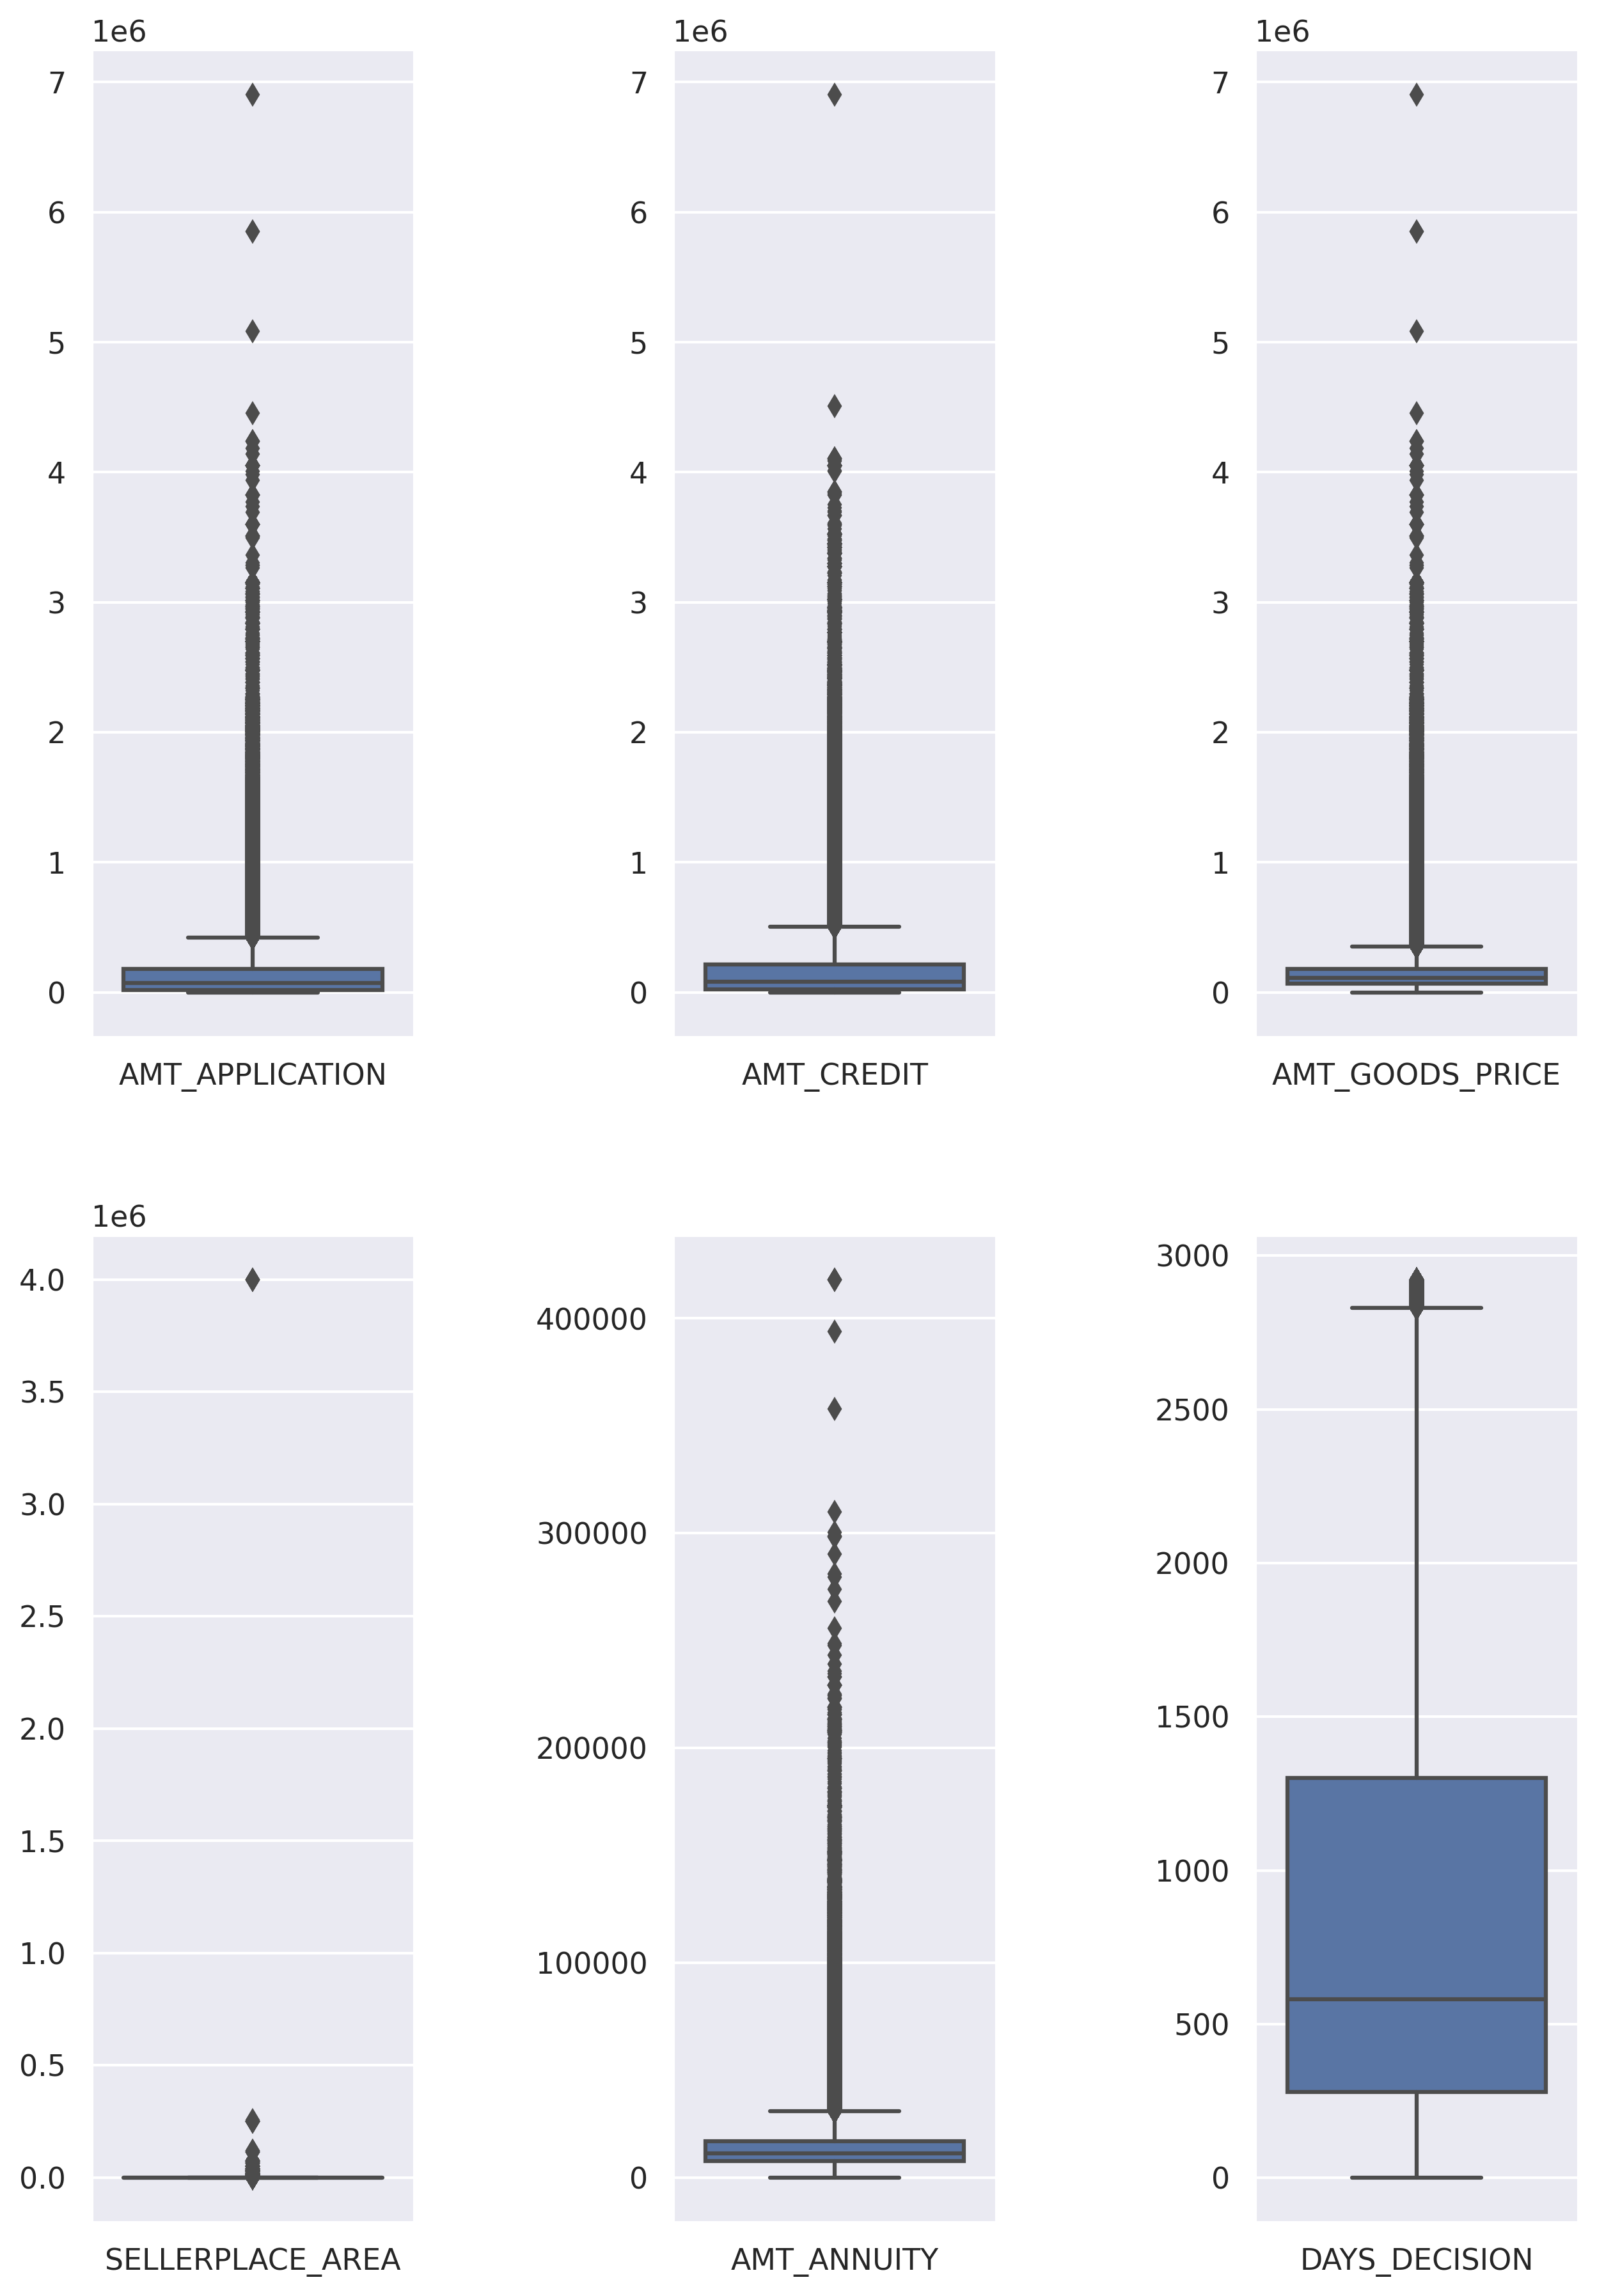

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2,3,figsize=[10,15])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =prev_app[['AMT_APPLICATION']],ax=axes[0,0])
sns.boxplot(data =prev_app[['AMT_CREDIT']],ax=axes[0,1])
sns.boxplot(data =prev_app[['AMT_GOODS_PRICE']],ax=axes[0,2])
sns.boxplot(data =prev_app[['SELLERPLACE_AREA']],ax=axes[1,0])
sns.boxplot(data =prev_app[['AMT_ANNUITY']],ax=axes[1,1])
sns.boxplot(data =prev_app[['DAYS_DECISION']],ax=axes[1,2])
plt.show()

**INFERENCE**: These box plots of some continuos variables from previous_application dataset represents outliers on the basis of quartile range. Out of 6, only 2 attributes have extreme outliers. These 2 are AMT_CREDIT, SELLERPLACE_AREA. Both of these attributes have no anomaly in outlier data and are possible in real world scenario.

####Handling outliers in application_data

In [ ]:
appdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
  

In [ ]:
print(f"The attributes which are numerical are \n {numerical_cols}")

The attributes which are numerical are 
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12

In [ ]:
for i in appdata.select_dtypes(include=['int64', 'float64' ]).columns.tolist():
  print("No. of unique values in ",i,"is",appdata[i].nunique(),".")

No. of unique values in  SK_ID_CURR is 307511 .
No. of unique values in  TARGET is 2 .
No. of unique values in  CNT_CHILDREN is 15 .
No. of unique values in  AMT_INCOME_TOTAL is 2548 .
No. of unique values in  AMT_CREDIT is 5603 .
No. of unique values in  AMT_ANNUITY is 13672 .
No. of unique values in  AMT_GOODS_PRICE is 1002 .
No. of unique values in  REGION_POPULATION_RELATIVE is 81 .
No. of unique values in  DAYS_EMPLOYED is 12574 .
No. of unique values in  DAYS_REGISTRATION is 15687 .
No. of unique values in  DAYS_ID_PUBLISH is 6168 .
No. of unique values in  FLAG_MOBIL is 2 .
No. of unique values in  FLAG_EMP_PHONE is 2 .
No. of unique values in  FLAG_WORK_PHONE is 2 .
No. of unique values in  FLAG_CONT_MOBILE is 2 .
No. of unique values in  FLAG_PHONE is 2 .
No. of unique values in  FLAG_EMAIL is 2 .
No. of unique values in  CNT_FAM_MEMBERS is 17 .
No. of unique values in  REGION_RATING_CLIENT is 3 .
No. of unique values in  REGION_RATING_CLIENT_W_CITY is 3 .
No. of unique values

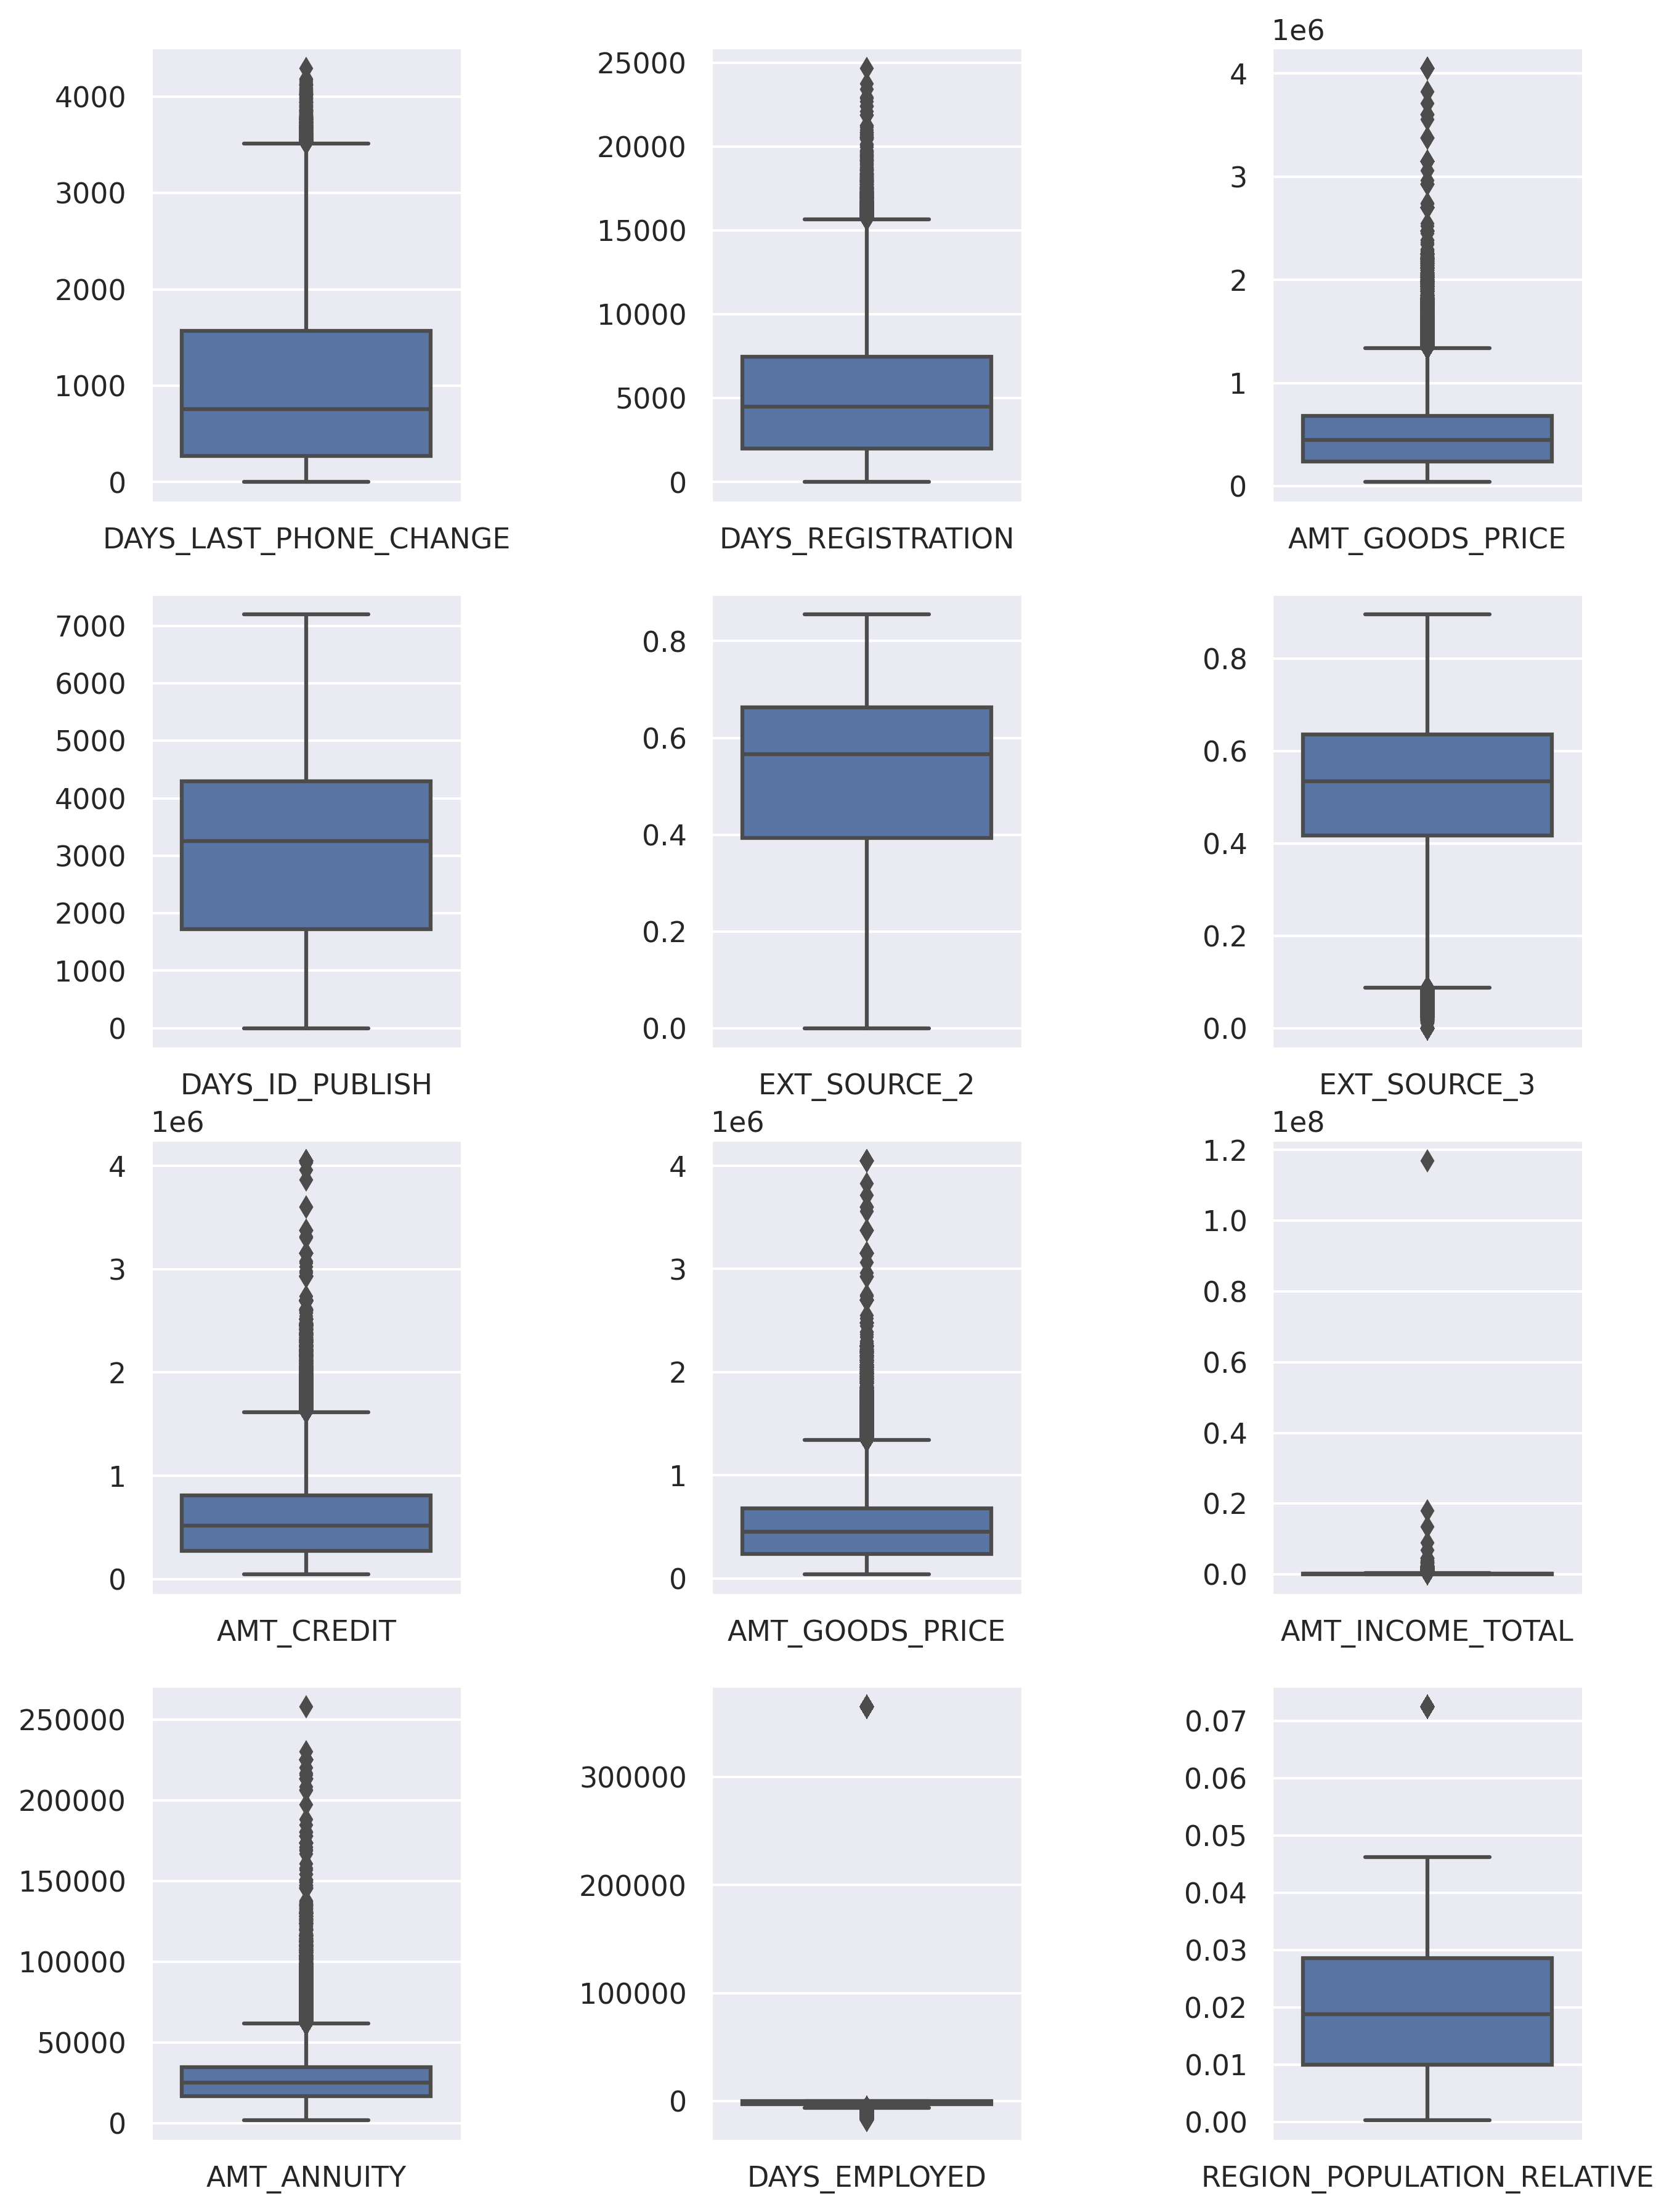

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(4,3,figsize=[10,15])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =appdata[['DAYS_LAST_PHONE_CHANGE']],ax=axes[0,0])
sns.boxplot(data =appdata[['DAYS_REGISTRATION']],ax=axes[0,1])
sns.boxplot(data =appdata[['AMT_GOODS_PRICE']],ax=axes[0,2])
sns.boxplot(data =appdata[['DAYS_ID_PUBLISH']],ax=axes[1,0])
sns.boxplot(data =appdata[['EXT_SOURCE_2']],ax=axes[1,1])
sns.boxplot(data =appdata[['EXT_SOURCE_3']],ax=axes[1,2])
sns.boxplot(data =appdata[['AMT_CREDIT']],ax=axes[2,0])
sns.boxplot(data =appdata[['AMT_GOODS_PRICE']],ax=axes[2,1])
sns.boxplot(data =appdata[['AMT_INCOME_TOTAL']],ax=axes[2,2])
sns.boxplot(data =appdata[['AMT_ANNUITY']],ax=axes[3,0])
sns.boxplot(data =appdata[['DAYS_EMPLOYED']],ax=axes[3,1])
sns.boxplot(data =appdata[['REGION_POPULATION_RELATIVE']],ax=axes[3,2])
plt.show()

**INFERENCE**: These box plots of some continuos variables from application_data represents outliers on the basis of quartile range. Out of 12, 11 attributes have outliers but only 4 have extreme outliers. These 4 include AMT_INCOME_TOTAL, AMT_ANNUITY, DAYS_EMPLOYED, REGION_POPULATION_RELATIVE.

AMT_INCOME_TOTAL

In [ ]:
appdata[appdata['AMT_INCOME_TOTAL']>20000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AGE_RANGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0,0,1,34.0,High,30-40


In [ ]:
print(appdata.loc[12840]['OCCUPATION_TYPE'])
print(appdata.loc[12840]['ORGANIZATION_TYPE'])

Laborers
Business Entity Type 3


In 'AMT_INCOME_TOTAL', this is an outlier with extremely high income that is around 11.7 crores which is not possible for the occupation type labor working in Organization Type -'Business Entity Type 3'. This record doesn't seem to have a correct value of the income as a labor's income is ususally not so high. We can impute this incorrect value with the average income of Laborers working in Organization Type -'Business Entity Type 3'.

In [ ]:
#Mean of all the Laborers working is Orgazization Type -'Business Entity Type 3' excluding the Incorrect Income Record

appdata[(appdata['OCCUPATION_TYPE']=='Laborers') & (appdata['ORGANIZATION_TYPE']=='Business Entity Type 3') 
   & (appdata['AMT_INCOME_TOTAL']<20000000)].AMT_INCOME_TOTAL.mean()

166996.15517931705

In [ ]:
appdata.loc[appdata['AMT_INCOME_TOTAL']>20000000,'AMT_INCOME_TOTAL'] = 166996.15517931705
print(appdata.loc[12840]['AMT_INCOME_TOTAL'])

166996.15517931705


DAYS_EMPLOYED

The outlier in this attribute is days employed before application date is more than 350000 days. Which is not possible as it corresponds to nearly 1000 years of employment.

In [ ]:
days_outlier_df = appdata[(appdata['DAYS_EMPLOYED']>350000)]

In [ ]:
print(days_outlier_df.shape)
print(days_outlier_df['NAME_INCOME_TYPE'].unique())

(55374, 75)
['Pensioner' 'Unemployed']


These outliers are records of applicants who are either pensioner or unemployed. I will impute this value with 0.

In [ ]:
appdata.loc[(appdata['DAYS_EMPLOYED']>350000),'DAYS_EMPLOYED'] = 0

CNT_CHILDREN

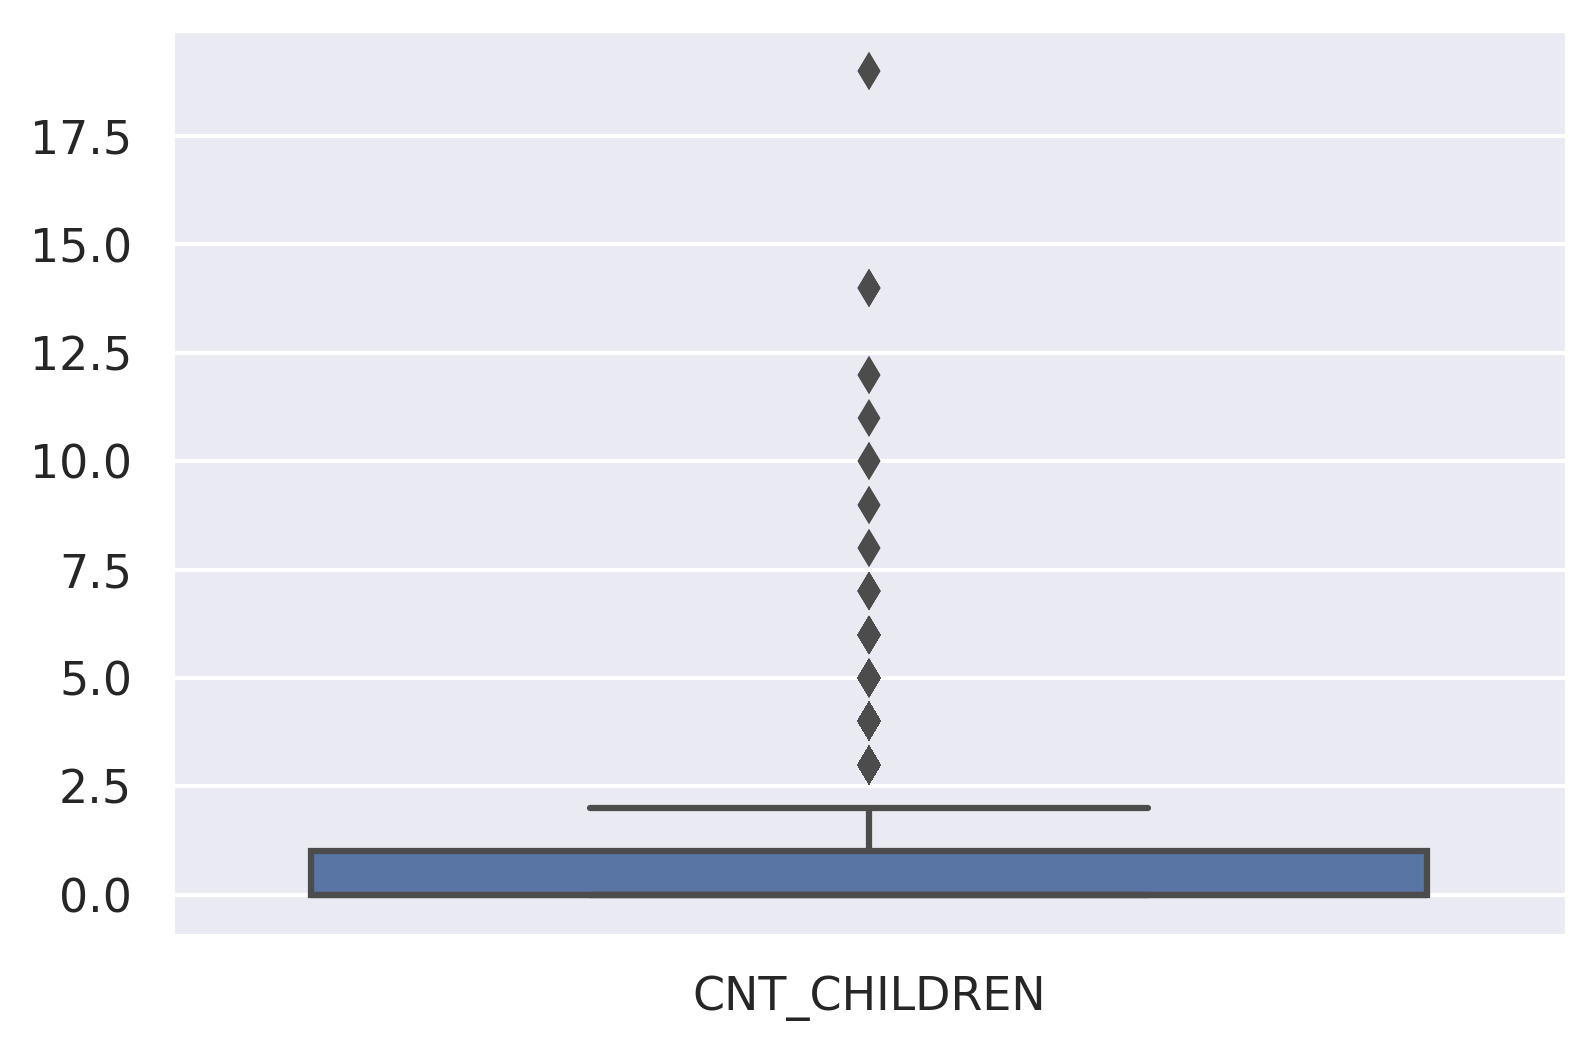

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(data =appdata[['CNT_CHILDREN']])
plt.show()

In [ ]:
appdata.CNT_CHILDREN.describe()
appdata[appdata['CNT_CHILDREN']>10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AGE_RANGE
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,...,0,0,0,0,0,0,0,47.0,Medium,40-50
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,...,0,0,0,0,1,0,3,38.0,Medium,30-40
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,0,0,0,0,0,0,4,30.0,Low,20-30
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,...,0,0,0,0,0,0,0,38.0,Medium,30-40
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,...,0,0,0,0,0,0,1,48.0,Medium,40-50
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,...,0,0,0,0,0,0,1,55.0,Very Low,50-60
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,0,0,0,0,0,0,2,28.0,Low,20-30
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,...,0,0,0,0,0,0,2,42.0,Very Low,40-50


Two applicants at row 155369 and 265784 are female of age 30 and 28 years and have 19 children which is an anomaly in data.


Observation of client's social surroundings

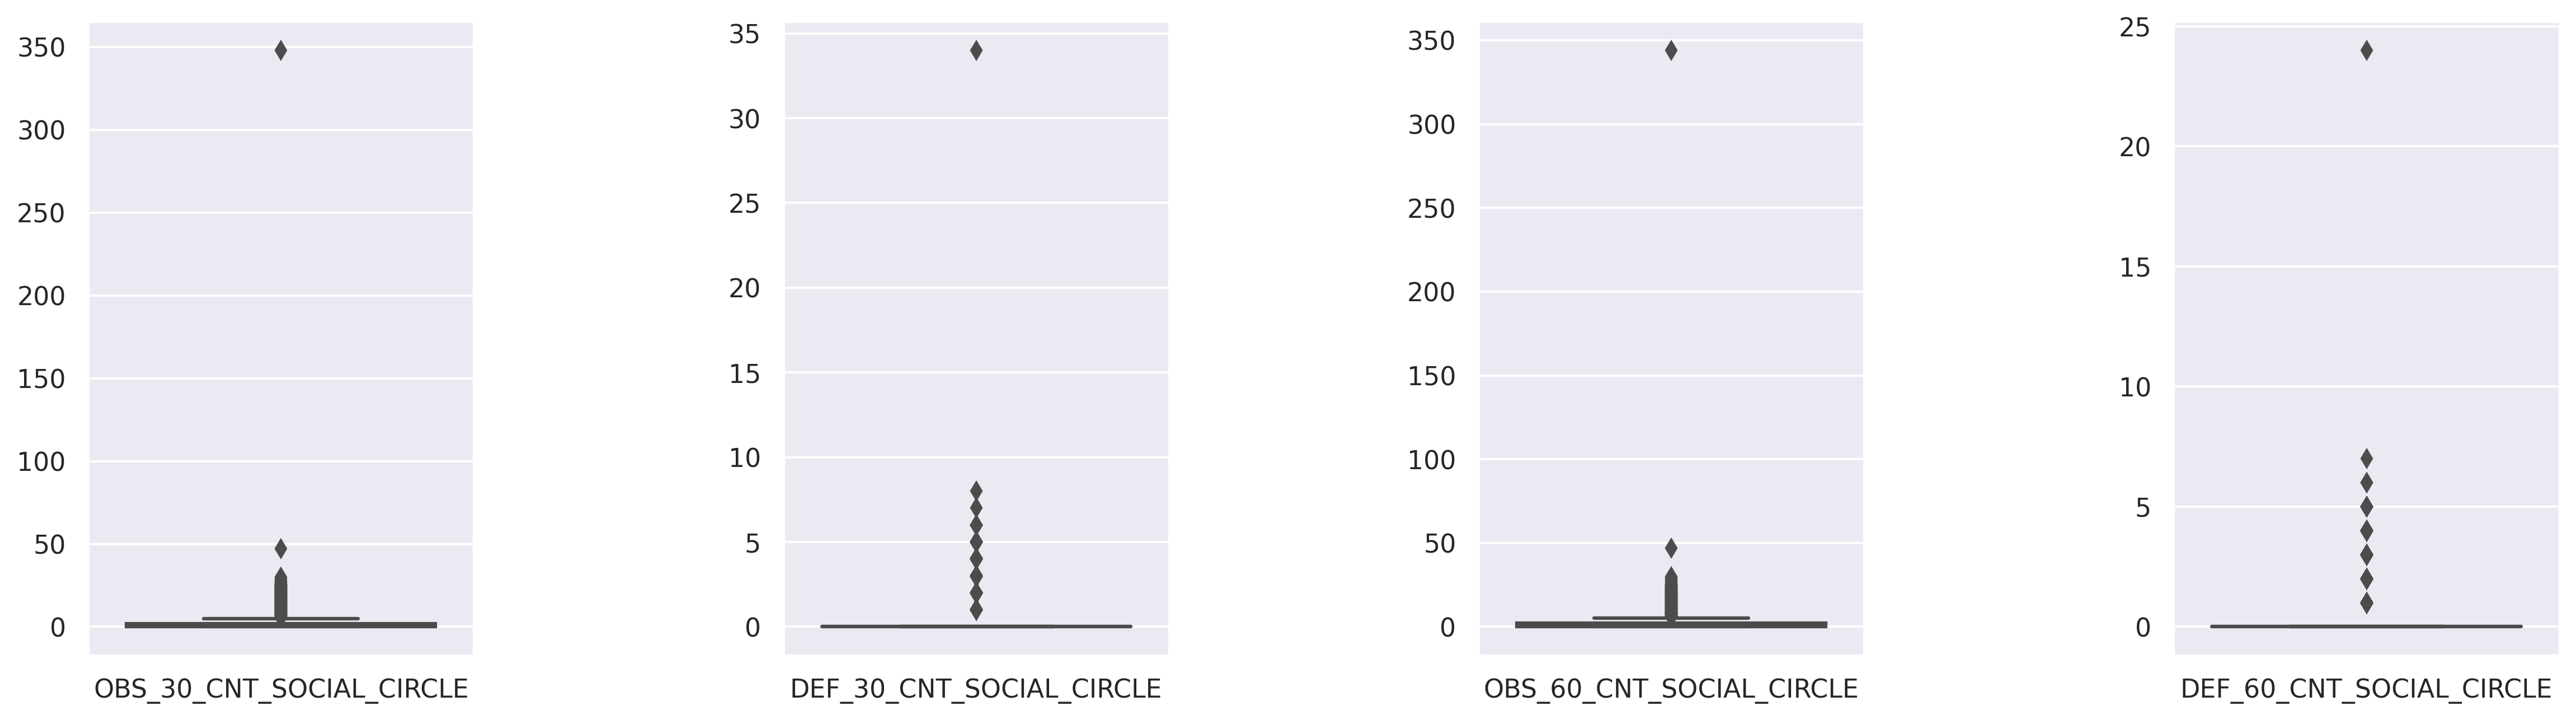

In [ ]:
fig, axes = plt.subplots(1,4,figsize=[19,5])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =appdata[['OBS_30_CNT_SOCIAL_CIRCLE']],ax=axes[0])
sns.boxplot(data =appdata[['DEF_30_CNT_SOCIAL_CIRCLE']],ax=axes[1])
sns.boxplot(data =appdata[['OBS_60_CNT_SOCIAL_CIRCLE']],ax=axes[2])
sns.boxplot(data =appdata[['DEF_60_CNT_SOCIAL_CIRCLE']],ax=axes[3])

plt.show()

In [ ]:
appdata[appdata['DEF_60_CNT_SOCIAL_CIRCLE']> 20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AGE_RANGE
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,...,0,0,0,1,1,0,3,27.0,Medium,20-30


In [ ]:
appdata.loc[148403,['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]

OBS_30_CNT_SOCIAL_CIRCLE    348
DEF_30_CNT_SOCIAL_CIRCLE     34
OBS_60_CNT_SOCIAL_CIRCLE    344
DEF_60_CNT_SOCIAL_CIRCLE     24
Name: 148403, dtype: object

Row number 148403 is an outlier in all 4 social surrounding observation for default columns.

### Merging Datasets

In [ ]:
merged_app_prev = appdata.merge(prev_app,on='SK_ID_CURR',suffixes=('_app', '_prev'),how='inner')

In [ ]:
merged_app_prev.shape

(1413701, 100)

In [ ]:
merged_app_prev.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
merged_app_prev.shape

(291057, 100)

### application_data and merged_app_prev data divided in two dataframes on the basis of TARGET variable

In [ ]:
# Dividing application_data dataset into two dataframes on the basis of Target Variable
target1_app = appdata[appdata['TARGET']==1] # Dataset of Client with payment difficulties
target1_map = merged_app_prev[merged_app_prev['TARGET']==1] # Dataset of Client with payment difficulties
target0_app = appdata[appdata['TARGET']==0] # Dataset of All other cases
target0_map = merged_app_prev[merged_app_prev['TARGET']==0] # Dataset of All other cases

#Data Wrangling and Visualisation

##application_data

### Understanding categorical variables

---



In [ ]:
# inline loop to display categorical variables
cat_cols_app = [col for col in appdata.columns if appdata[col].dtypes == 'O'] 
cat_cols_app

In [ ]:
# funtion to caluclate value counts in various columns
def val_num(df,colm):
    for i in colm:
        counts = df[i].value_counts().to_frame()
        percs = df[i].value_counts(normalize = True).to_frame()
        a = pd.concat([counts,(percs*100)], axis=1, keys=['count', 'percentage'])
        # print("COLUMN NAME: ",i,"\n",val)
        print(a)

In [ ]:
appdata.NAME_TYPE_SUITE.value_counts(normalize =True)

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [ ]:
val_num(appdata,['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START'])

In [ ]:
a = appdata.NAME_TYPE_SUITE.value_counts()
plot1 = a.plot.bar(figsize=(12, 10), color=['b', 'r', 'g', 'beige', 'brown','y','tan'])
plt.bar_label(plot1.containers[0],fontsize=14)
plt.title('Number of Applications per Category of accompanying people with client',fontsize=15)
plt.xlabel('Accompanying People',fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 81% applications received are from clients who were unaccompanied by family members.

In [ ]:
a = appdata.NAME_INCOME_TYPE.value_counts()
plot1 = a.plot.bar(figsize=(12, 10),color=['tan', 'yellow', 'g', 'beige', 'brown','y','b','orange'])
plt.bar_label(plot1.containers[0],fontsize=14)
plt.title("Number of Applications per Category of client's income type",fontsize=15)
plt.xlabel("Client's income type",fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
plt.xticks(fontsize=16,rotation = 60)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 51% applications received are from clients who were working. 

In [ ]:
a = appdata.NAME_FAMILY_STATUS.value_counts()
plot1 = a.plot.bar(figsize=(12, 10),color=['indigo', 'red', 'green', 'blue', 'orange','yellow'])
plt.bar_label(plot1.containers[0],fontsize=14)
plt.title("Number of Applications per Category of client's family status",fontsize=17)
plt.xlabel("Client's family status",fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
plt.xticks(fontsize=16,rotation=60)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 73% applications received are from clients who were married including civil married

In [ ]:
a = appdata.NAME_HOUSING_TYPE.value_counts()
plot1 = a.plot.bar(figsize=(12, 10),color=['teal', 'beige', 'tan', 'green', 'blue','indigo'])
plt.bar_label(plot1.containers[0], fontsize=14)
plt.title("Number of Applications per Category of housing situation of the client",fontsize=17)
plt.xlabel("Client's housing situation",fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
plt.xticks(fontsize=16,rotation=60)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 88% applications received are from clients who were residing in house/appartment.

In [ ]:
a = appdata.NAME_EDUCATION_TYPE.value_counts()
plot1 = a.plot.bar(figsize=(12, 10),color=['lightcoral','peachpuff','darkkhaki','seagreen','skyblue'])
plt.bar_label(plot1.containers[0], fontsize=12)
plt.title("Number of Applications per Category based on highest education by client",fontsize=17)
plt.xlabel("Client's highest education",fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
plt.xticks(fontsize=16,rotation = 50)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 71% applications received are from clients who were educated at secondary/secondary special level.

In [ ]:
a = appdata.WEEKDAY_APPR_PROCESS_START.value_counts().sort_values(ascending=False)
plot1 = a.plot.barh(figsize=(18, 18),color=['darkkhaki','thistle','aquamarine','seagreen','lightcoral','skyblue','peachpuff'])
plt.bar_label(plot1.containers[0], fontsize=15)
plt.title("Number of Applications on each day of week",fontsize=26)
plt.xlabel("Count of Applications",fontsize=18)
plt.ylabel('Day of Week',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Key Takeaway -** Around 17+-0.48% applications were received on weekdays from Monday to friday with tuesday being the day on which most application were received. On weekends the applications received were less which is around 11% on saturdays and only 5% on sunday.

In [ ]:
a = appdata.ORGANIZATION_TYPE.value_counts()
plot1 = a.plot.barh(figsize=(14, 14))
plt.bar_label(plot1.containers[0], fontsize=10)
plt.title("Number of Applications per category of organization where client works",fontsize=17)
plt.xlabel("Count of Applications",fontsize=18)
plt.ylabel('Organisation Type',fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Key Takeaway -** Majoirty Around 21% applications received are from clients who were working at business entity type 3 organization.

### Imbalance data and ratios

In [ ]:
a = appdata.TARGET.value_counts()
plot1 = a.plot.bar(figsize=(12, 10),color=['Seagreen','tomato'])
plt.bar_label(plot1.containers[0], fontsize=16)
plt.title("Number of Applications vs target variable",fontsize=17)
plt.xlabel("Target",fontsize=18)
plt.ylabel('Count of Applications',fontsize=18)
x = [0,1]
labels = ['All other cases', 'Client with payment difficulties']
plt.xticks(x,labels, fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Creating autopct arguments
def funcperc(pct, allvalues):
    absolute = int(pct/ 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [ ]:
a = appdata.TARGET.value_counts()
colors=['thistle','linen']
lg = ['All other cases','Client with payment difficulties']
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 7))
plt.title("Number of Applications per Category of contract type with client",fontsize=17)
wedges, texts, autotexts = ax.pie(a,autopct = lambda pct: funcperc(pct, a),colors = colors,labels = lg,textprops = dict(color ="rebeccapurple"))
ax.legend(wedges,lg)
plt.setp(autotexts, size = 12, weight ="bold")
plt.show()

**Key Takeaway -** Moderate degree of imbalance in data according to target variable

In [ ]:
a = appdata.CODE_GENDER.value_counts()
colors=['cadetblue','tan','black']
lg = ['Female','Male','XNA']
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(a,autopct = lambda pct: funcperc(pct, a),colors = colors,labels = lg,textprops = dict(color ="darkslategray"))
ax.legend(wedges,lg)
plt.setp(autotexts, size = 12, weight ="bold")
plt.title("Number of Applications per Category of gender of the client",fontsize=17)
plt.show()

**Key Takeaway -** Mild degree of imbalance in data according to gender attribute

In [ ]:
a = appdata.NAME_CONTRACT_TYPE.value_counts()
colors=['lightcoral','peachpuff']
lg = ['Cash loans','Revolving loans']
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 7))
plt.title("Number of Applications per Category of contract type with client",fontsize=17)
wedges, texts, autotexts = ax.pie(a,autopct = lambda pct: funcperc(pct, a),colors = colors,labels = lg,textprops = dict(color ="brown"))
ax.legend(wedges,lg)
plt.setp(autotexts, size = 12, weight ="bold")
plt.show()

**Key Takeaway -** Moderate degree of imbalance in data according to contract type column

In [ ]:
def imb_rat(df,colm):
    for i in colm:
        val = df[i].value_counts().to_frame(name="count").merge(
              df[i].value_counts(normalize=True).mul(100).round(2).astype('str').to_frame(name="Imbalance Ratio")+"%",left_index=True,right_index=True)
        print("COLUMN NAME: ",i,"\n",val)
        print()

In [ ]:
imb_rat(appdata,['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE'])

COLUMN NAME:  TARGET 
     count Imbalance Ratio
0  282686          91.93%
1   24825           8.07%

COLUMN NAME:  CODE_GENDER 
       count Imbalance Ratio
F    202448          65.83%
M    105059          34.16%
XNA       4            0.0%

COLUMN NAME:  NAME_CONTRACT_TYPE 
                   count Imbalance Ratio
Cash loans       278232          90.48%
Revolving loans   29279           9.52%



###Univariate analysis of application_data

####Numerical Variable Analysis

In [ ]:
sns.set_style('whitegrid')
def plot_dist(df,df1,cols):
    for col in cols:
        plt.figure(figsize=[10,4])
        sns.kdeplot(df[col],color = 'pink',label='Client with payment difficulties')
        sns.kdeplot(df1[col],color = 'indigo',label = 'All other cases')
        plt.legend()
        plt.title('Distribution of '+col,fontsize=15)
        plt.xlabel(col,fontsize=13)
        plt.ylabel('COUNT',fontsize=13)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

In [ ]:
plot_dist(target1_app,target0_app,['REGION_POPULATION_RELATIVE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_CREDIT','DAYS_EMPLOYED'])


**Key Takeaway -**
*   Most applications are from clients living in less populated region and also account for more clients with payment difficulties.
*   More number of applicants with payment difficulties have lower EXT_SOURCE_2 and EXT_SOURCE_3 score and applicants who do not default have higher scores.
*   There is no significant difference in defaulter clients and non defaulter clients in case of credit amount.
*   Applicants with low employment days tend to default more while applicants with more employment days do not have payment difficulties.



####Categorical Variable Analysis

In [ ]:
# function to count values in different variables along with normalized percentage
def unvarperc(df1,df2):
  a = (df1.value_counts()/df2.value_counts()*100).round(2).astype("str")+"%"
  return a

In [ ]:
# Function for preparing barplots easily
def cntplt(df,col,pt):
  plt.figure(figsize=[10,6])
  ax=sns.countplot(x=col,data=df, hue='TARGET', palette=pt)
  legend_labels, _= ax.get_legend_handles_labels()
  ax.legend(legend_labels, ['All other cases','Payment Defaults'],title='TARGET')
  plt.title('Applicant count in each category of ' +col,fontsize=13)
  plt.xlabel('Categories in '+col,fontsize=11)
  plt.ylabel('COUNT',fontsize=11)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.bar_label(ax.containers[0], fontsize=9)
  plt.bar_label(ax.containers[1], fontsize=9)
  plt.show()

In [ ]:
a = unvarperc(target1_app['AMT_INCOME_RANGE'],appdata['AMT_INCOME_RANGE']).to_frame()
b = unvarperc(target0_app['AMT_INCOME_RANGE'],appdata['AMT_INCOME_RANGE']).to_frame()
print(f'Payment Defaults in different income range\n{a}')
print(f'All other Cases in different income range\n{b}')

In [ ]:
cntplt(appdata,'AMT_INCOME_RANGE','husl')

**Key Takeaway:** Applicants with high income range have less chances of payment difficulties.

In [ ]:
a = unvarperc(target1_app['AGE_RANGE'],appdata['AGE_RANGE']).to_frame()
b = unvarperc(target0_app['AGE_RANGE'],appdata['AGE_RANGE']).to_frame()
print(f'Payment Defaults in different age range\n{a}')
print(f'All other Cases in different age range\n{b}')

In [ ]:
cntplt(appdata,'AGE_RANGE','hls')

**Key Takeaway:**Applicants of age group 20-30 and 30-40 yrs  have high chances of payment difficulties.

In [ ]:
a = unvarperc(target1_app['NAME_CONTRACT_TYPE'],appdata['NAME_CONTRACT_TYPE']).to_frame()
b = unvarperc(target0_app['NAME_CONTRACT_TYPE'],appdata['NAME_CONTRACT_TYPE']).to_frame()
print(f'Payment Defaults in each contract type\n{a}')
print(f'All other Cases in each contract type\n{b}')

In [ ]:
cntplt(appdata,'NAME_CONTRACT_TYPE','flare')

**Key Takeaway:**Application of cash loans  have high chances of payment difficulties than of revolving loans.

In [ ]:
a = unvarperc(target1_app['NAME_FAMILY_STATUS'],appdata['NAME_FAMILY_STATUS']).to_frame()
b = unvarperc(target0_app['NAME_FAMILY_STATUS'],appdata['NAME_FAMILY_STATUS']).to_frame()
print(f'Payment Defaults in each family status type\n{a}')
print(f'All other Cases in each family status type\n{b}')

In [ ]:
cntplt(appdata,'NAME_FAMILY_STATUS','PRGn')

**Key Takeaway:**Applicants who are widow have less chances of payment defaults where as people who are civil married have the highest.

In [ ]:
a = unvarperc(target1_app['OCCUPATION_TYPE'],appdata['OCCUPATION_TYPE']).to_frame()
b = unvarperc(target0_app['OCCUPATION_TYPE'],appdata['OCCUPATION_TYPE']).to_frame()
print(f'Payment Defaults in each occupation type\n{a}')
print(f'All other Cases in each occupation type\n{b}')

In [ ]:
plt.figure(figsize=[10,6])
ax=sns.countplot(y='OCCUPATION_TYPE',data=appdata, hue='TARGET', palette='Accent')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['All other cases','Payment Defaults'],title='TARGET')
plt.title('Applicant count in each occupation type',fontsize=13)
plt.xlabel('occupation type',fontsize=11)
plt.ylabel('COUNT',fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.bar_label(ax.containers[0], fontsize=7.2)
plt.bar_label(ax.containers[1], fontsize=7.2)
plt.show()

**Key Takeaway:** Applicants who are low-skilled laborers have highest chances of payment difficulties and applicants who are high skill tech staff and accountants have less cases of payment defaults.

In [ ]:
a = unvarperc(target1_app['NAME_HOUSING_TYPE'],appdata['NAME_HOUSING_TYPE']).to_frame()
b = unvarperc(target0_app['NAME_HOUSING_TYPE'],appdata['NAME_HOUSING_TYPE']).to_frame()
print(f'Payment Defaults\n{a}')
print(f'All other cases\n{b}')

In [ ]:
plt.figure(figsize=[10,6])
ax=sns.countplot(x='NAME_HOUSING_TYPE',data=appdata, hue='TARGET', palette='RdGy')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['All other cases','Payment Defaults'],title='TARGET')
plt.title('Applicant count in each housing type',fontsize=13)
plt.xlabel('Housing type',fontsize=11)
plt.ylabel('COUNT',fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.bar_label(ax.containers[0], fontsize=9)
plt.bar_label(ax.containers[1], fontsize=9)
plt.show()

**Key Takeaway:** Applicants living with parents or in rented apartments have more chances of payment difficulties than applicants living in other housing types.

In [ ]:
a = unvarperc(target1_app['FLAG_OWN_CAR'],appdata['FLAG_OWN_CAR']).to_frame()
b = unvarperc(target0_app['FLAG_OWN_CAR'],appdata['FLAG_OWN_CAR']).to_frame()
print(f'Payment Defaults in each housing type\n{a}')
print(f'All other Cases in each housing type\n{b}')

Payment Defaults in each housing type
  FLAG_OWN_CAR
N         8.5%
Y        7.24%
All other Cases in each housing type
  FLAG_OWN_CAR
N        91.5%
Y       92.76%


In [ ]:
cntplt(appdata,'FLAG_OWN_CAR','PuOr')

**Key Takeaway:**People who do not own a car have faced payment difficulties.

In [ ]:
a = unvarperc(target1_app['FLAG_OWN_REALTY'],appdata['FLAG_OWN_REALTY']).to_frame()
b = unvarperc(target0_app['FLAG_OWN_REALTY'],appdata['FLAG_OWN_REALTY']).to_frame()
print(f'Payment Defaults \n{a}')
print(f'All other Cases \n{b}')

Payment Defaults 
  FLAG_OWN_REALTY
Y           7.96%
N           8.32%
All other Cases 
  FLAG_OWN_REALTY
Y          92.04%
N          91.68%


In [ ]:
cntplt(appdata,'FLAG_OWN_REALTY','PuOr')

**Key Takeaway:**People who do not own a Realty have faced payment difficulties.

###Bivariate Analysis

In [ ]:
heat = ['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE']
heat0 = target0_app[heat].corr(method='pearson')
heat0.iplot(kind = 'heatmap',colorscale = 'Blues',title = 'Correlation Heatmap of all other cases')

In [ ]:
heat1 = target1_app[heat].corr(method='pearson')
heat1.iplot(kind = 'heatmap',colorscale = 'Blues',title = 'Correlation Heatmap of payment difficulties')

In [ ]:
plt.close();
sns.set_style('darkgrid');
sns.pairplot(data=appdata, vars=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE'],  hue='TARGET',height = 3)
plt.show()

In [ ]:
plt.close();
sns.set_style('darkgrid');
sns.pairplot(data=appdata, vars=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE'],  hue='CODE_GENDER',height = 3)
plt.show()

In [ ]:
plt.close();
sns.set_style('darkgrid');
sns.pairplot(data=appdata, vars=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE'],  hue='NAME_CONTRACT_TYPE',height = 3)
plt.show()

**Key Takeaway:** There is a correlation between AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY. There is no direct relation between AMT_INCOME_TOTAL and the other three attributes. 


In [ ]:
sns.violinplot(data=appdata, x='AGE_RANGE', y="AMT_CREDIT",hue = 'TARGET')
plt.show()

**Key Takeaway:** From the above plot, it is clearly visible that in each age range from 20-70, applicants applied for credit amounts of 0-10 lakh in most cases.

In [ ]:
sns.violinplot(data=appdata, x="CODE_GENDER", y="AMT_CREDIT",hue = 'TARGET')
plt.show()

**Key Takeaway:** From the above plot, it is clearly visible that both male and female have applied for a maximum of around 40 lakhs of credit. The males who defaulted on payment have applied for a maximum of around 30 lakhs of credit amount which is less than that of females.

In [ ]:
plt.figure(figsize=[13,5])
ax=sns.barplot(data=appdata, x='CODE_GENDER', y='CNT_CHILDREN', hue='TARGET',palette='RdYlBu')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['All other cases','Payment Defaults'],title='TARGET')
plt.title('Children Count vs Gender',fontsize=16)
plt.ylabel('Children Count', fontsize=14)
plt.xlabel('GENDER',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Key Takeaway:** From the above plot, it is clearly visible that females with more children have chances of payment difficulties. In contrast to this, male with fewer children have chances of payment difficulties.

In [ ]:
plt.figure(figsize=[13,5])
sns.barplot(data=appdata, x='AMT_INCOME_RANGE', y='AMT_CREDIT', hue='AGE_RANGE',palette='Pastel2')
plt.title('Credit Amount vs Income Range for all Age Groups ',fontsize=16)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Key Takeaway:**From the above plot, it is clearly visible that credit amount is directly proportional with income range and the pattern of age range with respect to credit amount in each income group remains the same where the credit amount increases from age of 20-60 and drops in 60-70 range.

In [ ]:
plt.figure(figsize=[10,8])
ax=sns.boxplot(data=appdata, x="AMT_INCOME_RANGE", y="AMT_CREDIT", hue="TARGET", palette='Set2')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Credit Amount vs Income Range for Defaulters and Non-Defaulters ',fontsize=16)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Key Takeaway:** From the above plot, it is clearly visible that applicants in the very low income range with an annual salary less than 75000 have difficulty in payments when credit amount is high. Rest applicants in other 3 income range groups with income shows a similar pattern. All of the applicants in these income ranges have payment difficulties in case of lesser credit amount.

In [ ]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data =target1_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='Dark2')
plt.title('Default : Credit amount vs Education Status',fontsize=15)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('EDUCATION TYPE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data =target0_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='Dark2')
plt.title('Non-Default : Credit amount vs Education Status',fontsize=15)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('EDUCATION TYPE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45)
plt.show()

**Key Takeaway:** From the above plot, it is clearly visible that applicants with high education have applied for large credit amounts and also defaulted more on payments. Out of all applicants who have academic degrees only people who are married defaulted on payments.

###Correlations

In [ ]:
num_cols_app = [col for col in appdata.columns if appdata[col].dtypes != 'O']
num_cols_app

In [ ]:
#Correlation matrix for numerical columns
corr0=target1_app[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
              'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
             'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(bool))
corrdf0 = corr0.stack().reset_index()
corrdf0.dropna(inplace = True)
corrdf0.columns=['Attribute-1','Attribute-2','Correlation']
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

In [ ]:
plt.figure(figsize=[15,5])
sns.heatmap(target1_app[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                   'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),
            cmap='PuRd',annot=True)
plt.title('Top 10 Correlation in the clients with payment difficulties Data',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Correlation matrix for numerical columns
corr0=target0_app[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
              'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
             'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(bool))
corrdf0 = corr0.stack().reset_index()
corrdf0.dropna(inplace = True)
corrdf0.columns=['ATTR1','ATTR2','Correlation']
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

In [ ]:
plt.figure(figsize=[15,5])
sns.heatmap(target0_app[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                   'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),
            cmap='BuGn',annot=True)
plt.title('Top 10 Correlation in the Clients in All other cases Data',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Merged data of application_data and Previous_application data



In [ ]:
def cat2(a,col):
  plot1 = a.plot.bar(figsize=(12, 10),color=['teal', 'beige', 'tan', 'green', 'blue','indigo','lightcoral','peachpuff','darkkhaki','seagreen','skyblue'])
  plt.bar_label(plot1.containers[0],fontsize=14)
  plt.title("Number of Applications per Category of "+col,fontsize=15)
  plt.xlabel(col,fontsize=18)
  plt.ylabel('Count of Applications',fontsize=18)
  plt.xticks(fontsize=16,rotation = 60)
  plt.yticks(fontsize=16)
  plt.show()

In [ ]:
cat_cols_merge = [col for col in merged_app_prev.columns if merged_app_prev[col].dtypes == 'O']
cat_cols_merge

['NAME_CONTRACT_TYPE_app',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_app',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_prev',
 'WEEKDAY_APPR_PROCESS_START_prev',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [ ]:
a = unvarperc(target1_map['NAME_CLIENT_TYPE'],merged_app_prev['NAME_CLIENT_TYPE']).to_frame()
b = unvarperc(target0_map['NAME_CLIENT_TYPE'],merged_app_prev['NAME_CLIENT_TYPE']).to_frame()
print(f'Payment Defaults by each client type\n{a}')
print(f'All other Cases by each client type\n{b}')

Payment Defaults by each client type
          NAME_CLIENT_TYPE
Repeater             8.09%
New                  8.79%
Refreshed            6.62%
XNA                 10.34%
All other Cases by each client type
          NAME_CLIENT_TYPE
Repeater            91.91%
New                 91.21%
Refreshed           93.38%
XNA                 89.66%


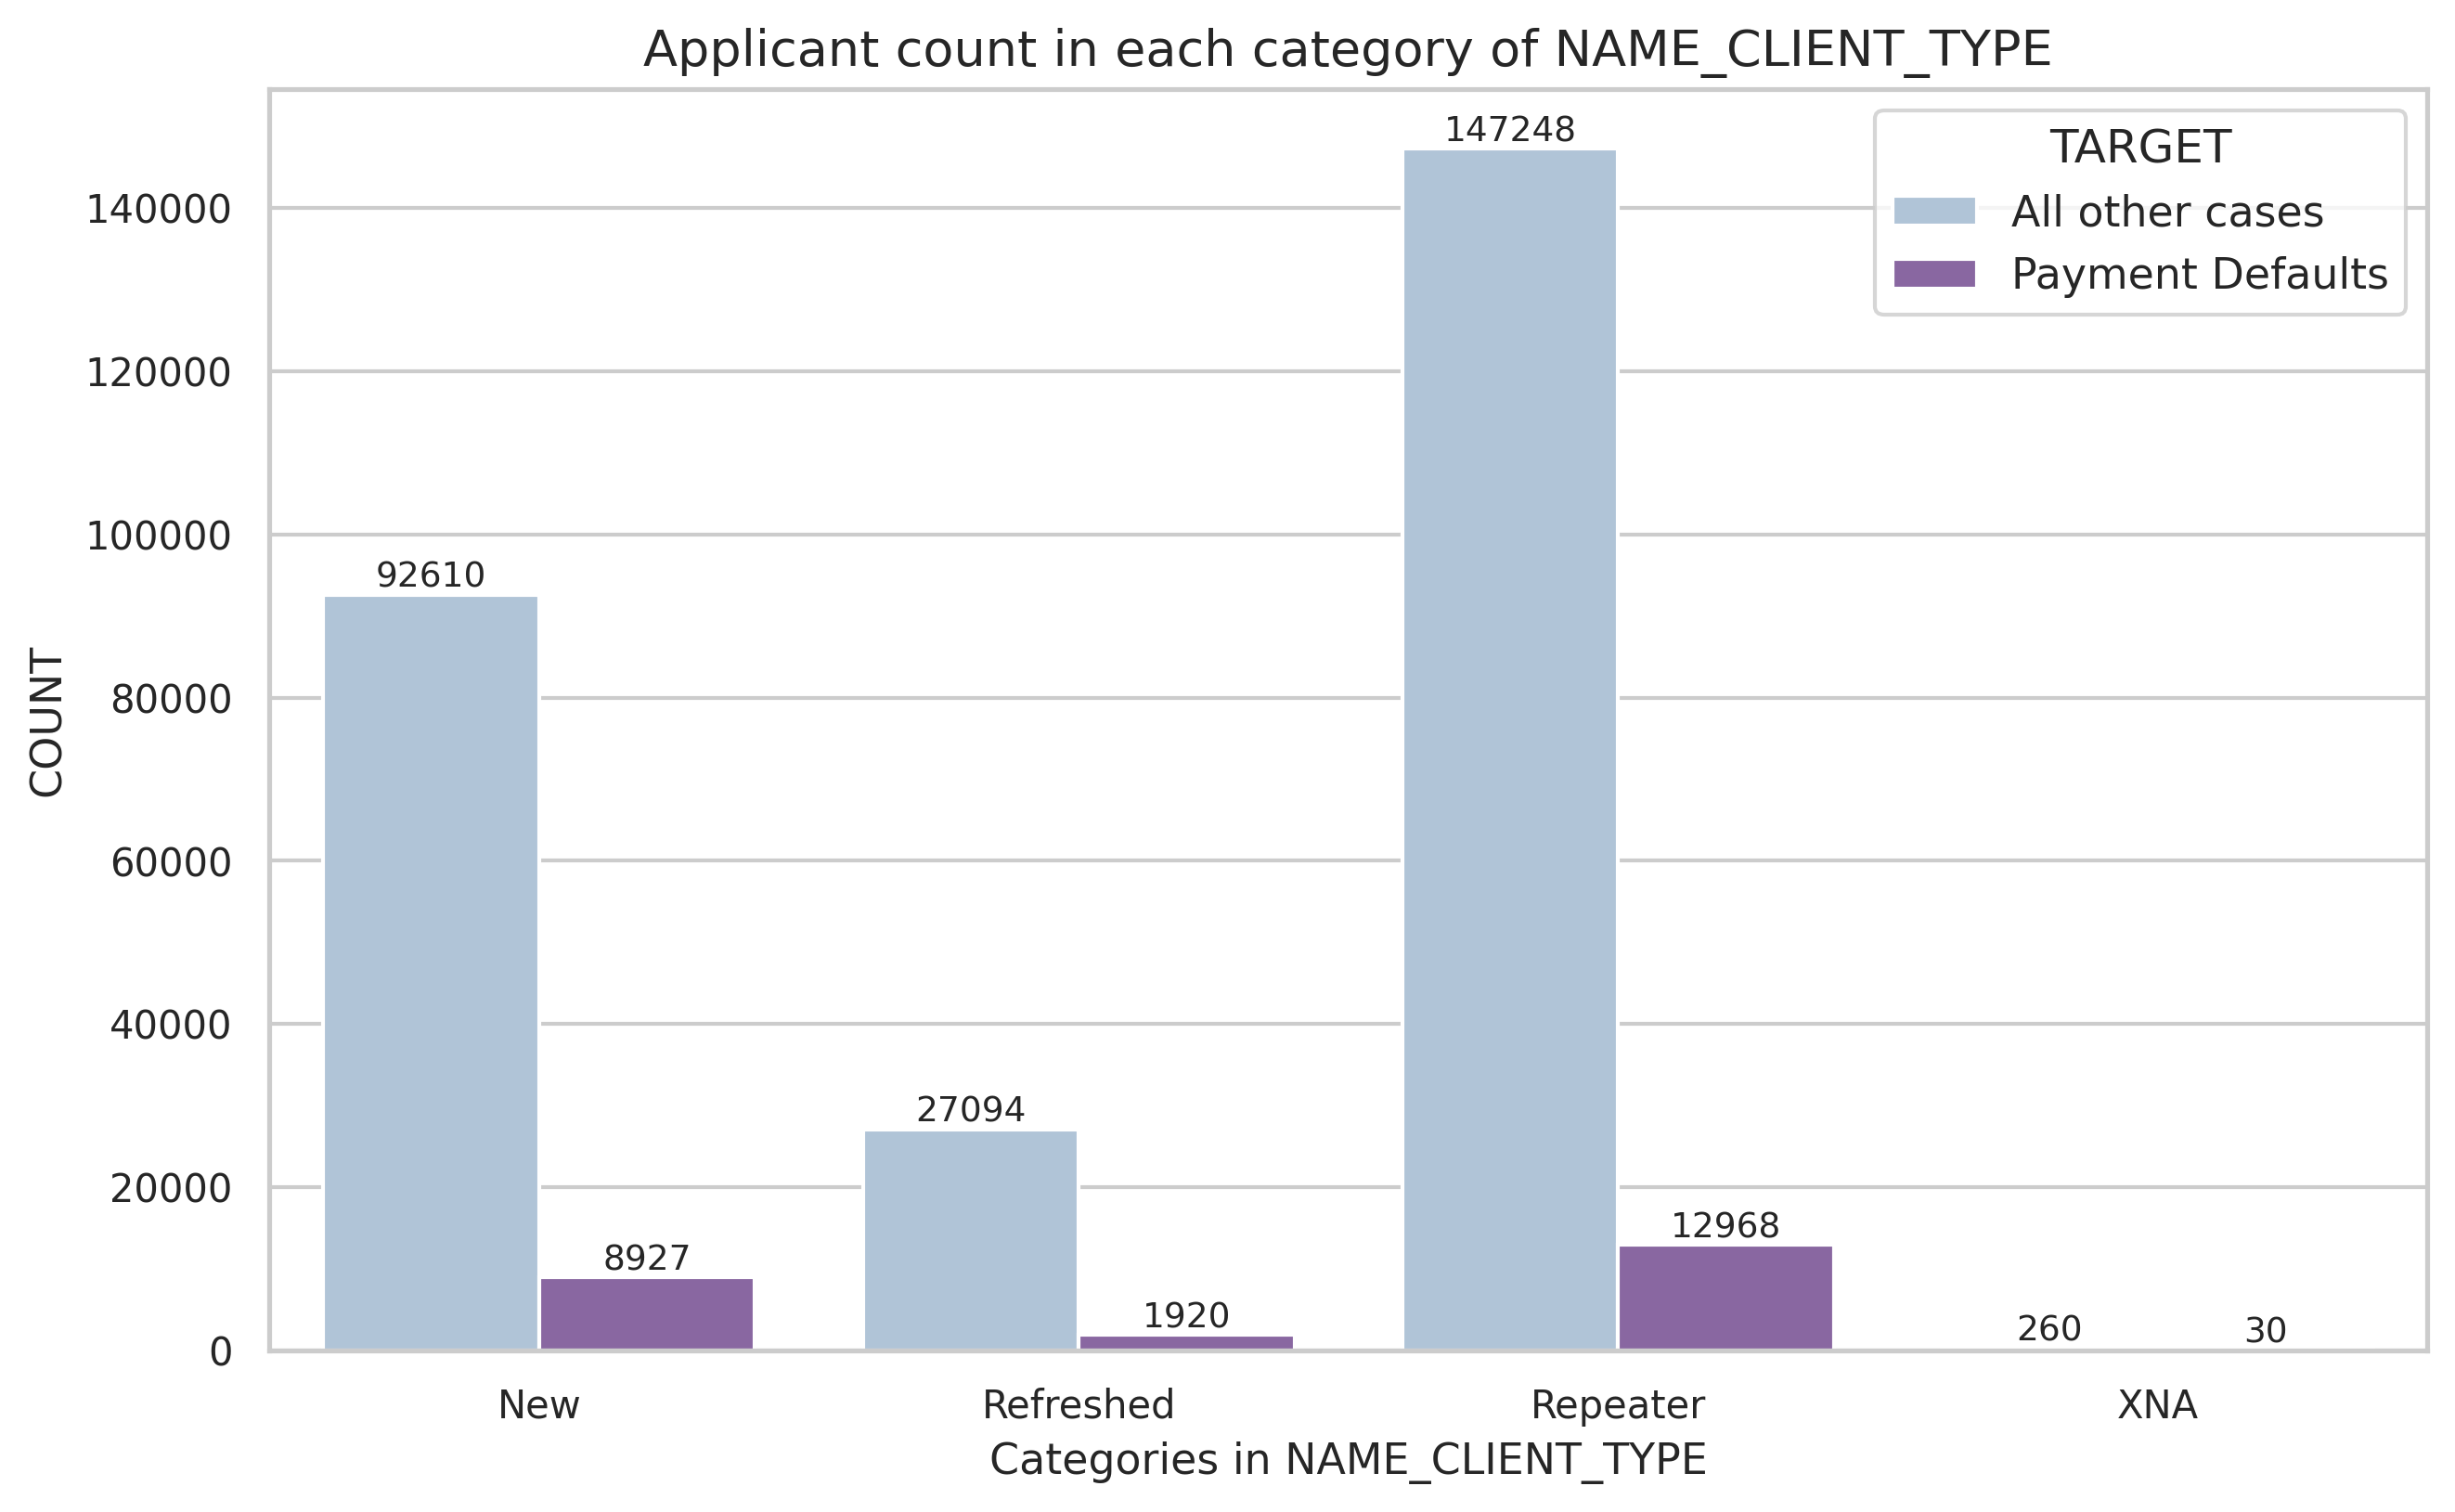

In [ ]:
cntplt(merged_app_prev,'NAME_CLIENT_TYPE','BuPu')

**Key Takeaway:** Applicants who are refreshed have less cases of payment defaults where as who are new have more cases of payment defaults.

In [ ]:
a = unvarperc(target1_map['NAME_YIELD_GROUP'],merged_app_prev['NAME_YIELD_GROUP']).to_frame()
b = unvarperc(target0_map['NAME_YIELD_GROUP'],merged_app_prev['NAME_YIELD_GROUP']).to_frame()
print(f'Payment Defaults in each type of interest rate\n{a}')
print(f'All other Cases in each type of interest rate\n{b}')

In [ ]:
cntplt(merged_app_prev,'NAME_YIELD_GROUP','Paired')

**Key Takeaway:**  Applicants whose previous application interest rate are grouped into high yield group have more cases of payment difficulties where as same in low_action yield group have less chance of payment difficulties. Here, XNA represents clients with no information about previous application interest rates and also have higher cases of payment difficulties.

In [ ]:
a = unvarperc(target1_map['NAME_CONTRACT_STATUS'],merged_app_prev['NAME_CONTRACT_STATUS']).to_frame()
b = unvarperc(target0_map['NAME_CONTRACT_STATUS'],merged_app_prev['NAME_CONTRACT_STATUS']).to_frame()
print(f'Payment Defaults by clients\n{a}')
print(f'All other Cases \n{b}')

Payment Defaults by clients
             NAME_CONTRACT_STATUS
Approved                    7.61%
Canceled                    8.52%
Refused                     11.7%
Unused offer                8.05%
All other Cases 
             NAME_CONTRACT_STATUS
Approved                   92.39%
Canceled                   91.48%
Refused                     88.3%
Unused offer               91.95%


In [ ]:
cntplt(merged_app_prev,'NAME_CONTRACT_STATUS','RdYlGn')

**Key Takeaway:**  Applicants whose previous applications are approved have less chance of payment defaults and same of whose are refused have more cases of payment defaults.

In [ ]:
a = unvarperc(target1_map['NAME_PORTFOLIO'],merged_app_prev['NAME_PORTFOLIO']).to_frame()
b = unvarperc(target0_map['NAME_PORTFOLIO'],merged_app_prev['NAME_PORTFOLIO']).to_frame()
print(f'Payment Defaults by clients\n{a}')
print(f'All other Cases \n{b}')

Payment Defaults by clients
      NAME_PORTFOLIO
POS            7.57%
Cash           8.67%
XNA            9.04%
Cards           9.7%
Cars           6.49%
All other Cases 
      NAME_PORTFOLIO
POS           92.43%
Cash          91.33%
XNA           90.96%
Cards          90.3%
Cars          93.51%


In [ ]:
cntplt(merged_app_prev,'NAME_PORTFOLIO','Pastel2')

**Key Takeaway:**  Applicants whose previous loan application was for cars did not have payment difficulties whereas the same for cards have most chances of default.

In [ ]:
a = unvarperc(target1_map['CHANNEL_TYPE'],merged_app_prev['CHANNEL_TYPE']).to_frame()
b = unvarperc(target0_map['CHANNEL_TYPE'],merged_app_prev['CHANNEL_TYPE']).to_frame()
print(f'Payment Defaults by clients\n{a}')
print(f'All other Cases \n{b}')

In [ ]:

plt.figure(figsize=[10,6])
ax=sns.countplot(x='CHANNEL_TYPE',data=merged_app_prev, hue='TARGET', palette='Pastel1')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['All other cases','Payment Defaults'],title='TARGET')
plt.title('Applicant count in each category of CHANNEL_TYPE',fontsize=13)
plt.xlabel('Categories in CHANNEL_TYPE',fontsize=11)
plt.ylabel('COUNT',fontsize=11)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.bar_label(ax.containers[0], fontsize=9)
plt.bar_label(ax.containers[1], fontsize=9)
plt.show()

**Key Takeaway:**  Applicants whose channel of sale for loan was through AP+(Cash Loan) have more percentage of defaults. According to the number of applications and default rate, the best channel for sale is Country-wide.

In [ ]:
a = unvarperc(target1_map['PRODUCT_COMBINATION'],merged_app_prev['PRODUCT_COMBINATION']).to_frame()
b = unvarperc(target0_map['PRODUCT_COMBINATION'],merged_app_prev['PRODUCT_COMBINATION']).to_frame()
print(f'Payment Defaults by clients\n{a}')
print(f'All other Cases \n{b}')

In [ ]:
plt.figure(figsize=[20,5])
ax=sns.countplot(data=merged_app_prev, hue='TARGET', x='PRODUCT_COMBINATION', palette='Accent')
plt.xticks(rotation = 70)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['All other cases','Clients with payment difficulties'],title='TARGET')
plt.title('Applicant count for each Product Combination',fontsize=16)
plt.xlabel('PRODUCT COMBINATION',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Key Takeaway:**  Applicants who take credit at POS for industry without interest have least cases of payment defaults. Applicants with cash product combination overall have more payment defaults. Also, with the presence of interest on credit, the default rate cases increases.

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(data=merged_app_prev, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', hue='TARGET', palette='Dark2')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Application Loan Amt vs Contract Status',fontsize=16)
plt.xlabel('CONTRACT STATUS',fontsize=14)
plt.ylabel('APPLICATION AMOUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Key Takeaway:**  Applicants who applied for more than 1.75 lakhs are refused, even some clients have no payment difficulties.

# Conclusion
####From application_data it can be concluded that according to the number of applications and default rate,
*   Applicants from the age group 20-30yrs should be avoided.
*   Although widows have low cases of defaults but due to population size married people have less chances
*   People who own cars or flat/house should be preferred
*   Applicants living in house/apartment have less chances of default and who are living with parents or rentals should be avoided.
*   Applicants with occupation_type  Accountants, core staff, high skill tech staff, managers, medicine staff have less chances of defaults.
*   EXT_SOURCE_3 score and EXT_SOURCE_2 score are good scores to predict defaults.
*   Applicants with higher education should be targeted for credit sale


####From merged data it can concluded that according to the number of applications and default rate,


*   The best channel for sale is Country-wide
*   Suitable Applicant is that whose previous loan application was for POS.
*   The best product combination is POS for household with interest
*   Whose Previous application interest rate are low_normal or middle
